In [84]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
iris = load_iris()

In [86]:
X = iris.data
Y = iris.target

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

scaler = StandardScaler(X_train,Y_train)

In [88]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [89]:
#Base model
dt=DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear',random_state=0,probability=True)

In [90]:
voting=VotingClassifier([('dt',dt),('knn',knn),('svm',svm)],voting='soft')
voting.fit(X_train,Y_train)
y_pred_voting=voting.predict(X_test)

In [91]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=50,random_state=0)
bagging.fit(X_train,Y_train)
y_pred_bagging = bagging.predict(X_test)

In [92]:
boosting = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=50,random_state=0)
boosting.fit(X_train,Y_train)
y_pred_boosting = boosting.predict(X_test)

In [93]:
gradient_boosting = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=50,random_state=0)
gradient_boosting.fit(X_train,Y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

In [94]:
stacking = StackingClassifier(estimators=[('knn',knn),('svm',svm),('dt',dt)],final_estimator=LogisticRegression())
stacking.fit(X_train,Y_train)
y_pred_stack = stacking.predict(X_test)

In [98]:
def evaluate_model(name,y_true,y_pred):
    print(f"{name} Performance")
    print("Accuracy Matrix: ", accuracy_score(y_true,y_pred));
    print("Classification report: " , classification_report(y_true,y_pred))
    cm=confusion_matrix(y_true,y_pred)

    plt.figure(figsize=(12,8))
    sns.heatmap(cm,xticklabels=iris.target_names,yticklabels=iris.target_names,cmap="coolwarm")
    plt.title(f"{name} Confusion Metrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    

Voting Classifier Performance
Accuracy Matrix:  1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



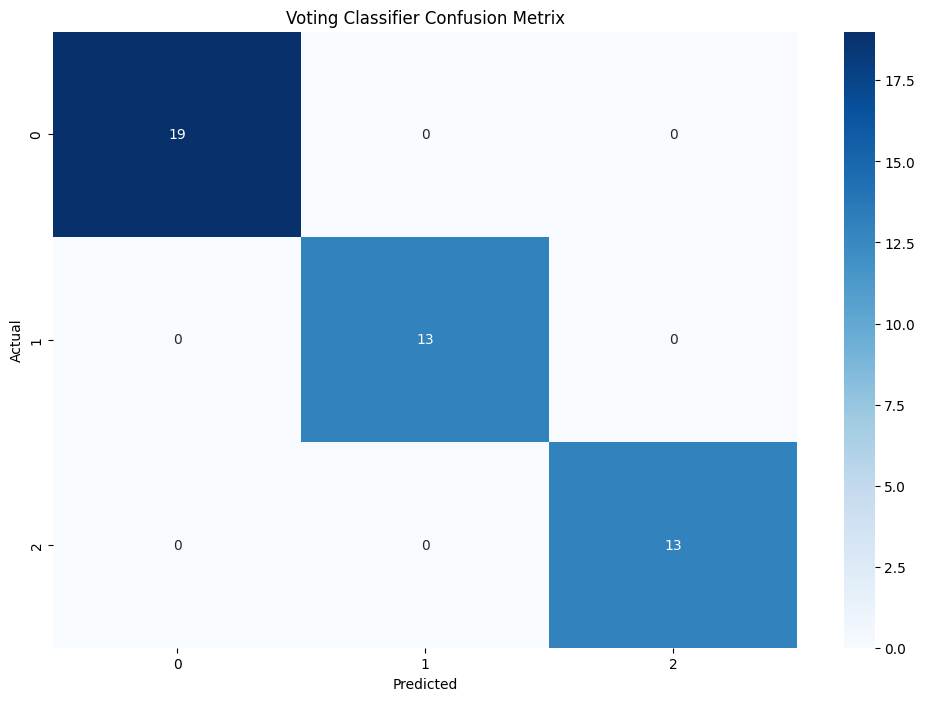

Bagging Classifier Performance
Accuracy Matrix:  1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



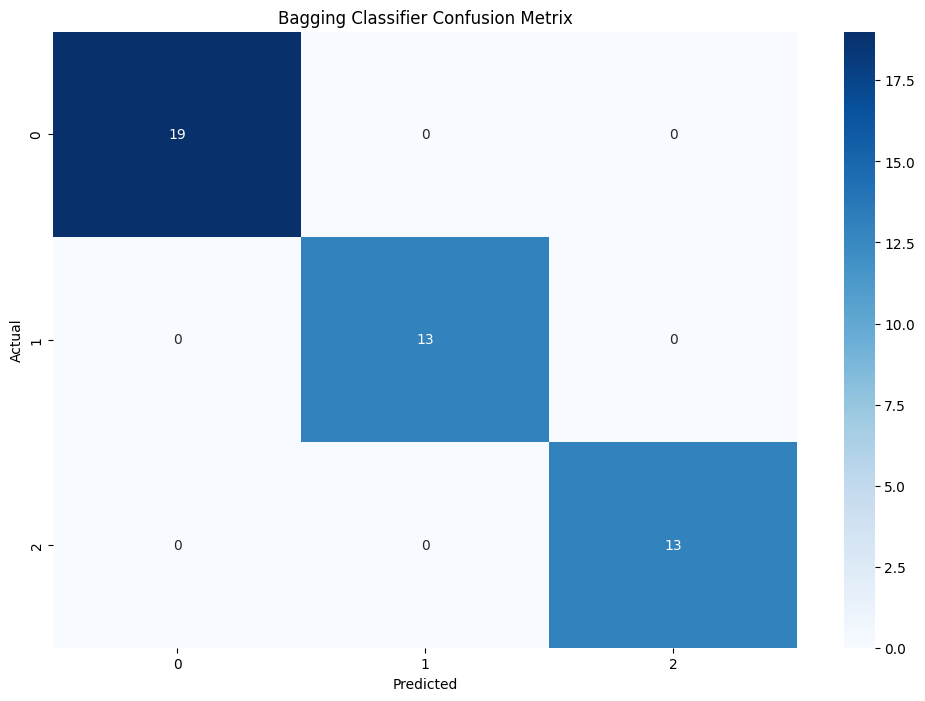

Boosting Classifier Performance
Accuracy Matrix:  1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



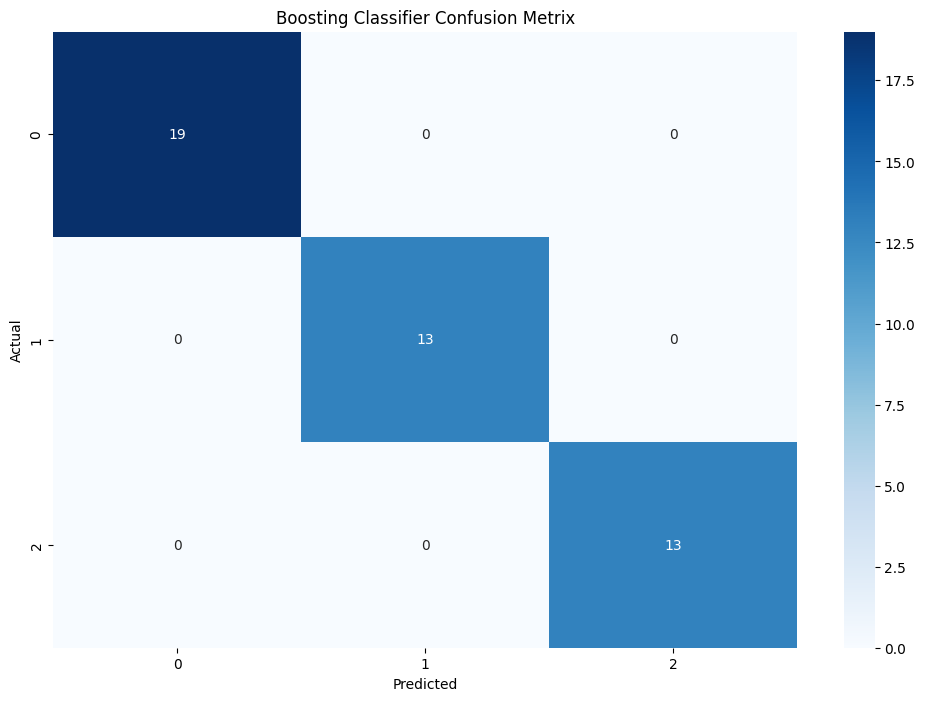

In [101]:
evaluate_model("Voting Classifier",Y_test,y_pred_voting)
evaluate_model("Bagging Classifier",Y_test,y_pred_bagging)
evaluate_model("Boosting Classifier",Y_test,y_pred_boosting)